In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dataset=load_iris()

In [23]:
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

Text(0.5, 1.0, 'GMM Classification')

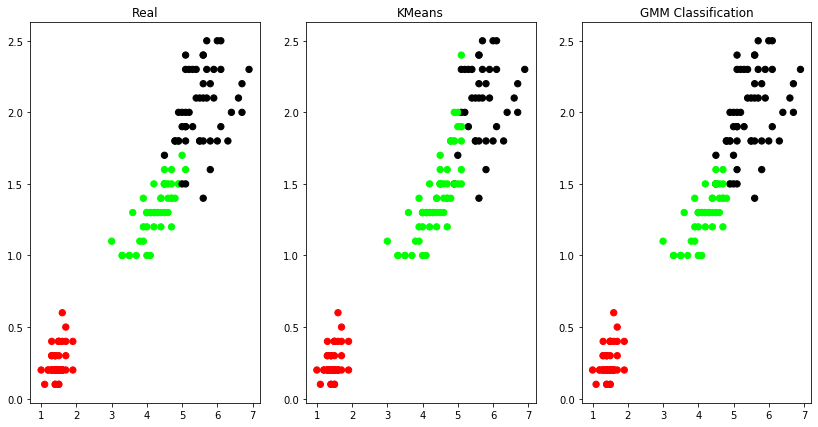

In [13]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
#REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')
#K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)

#fix
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)


plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

#GMM PLO
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)


gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [20]:
print(sm.accuracy_score(y, predY))
print(sm.accuracy_score(y,y_cluster_gmm))

0.8933333333333333
0.9666666666666667


In [22]:
print(sm.confusion_matrix(y, predY))
print(sm.confusion_matrix(y, y_cluster_gmm))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
